Output()

<IPython.core.display.Javascript object>


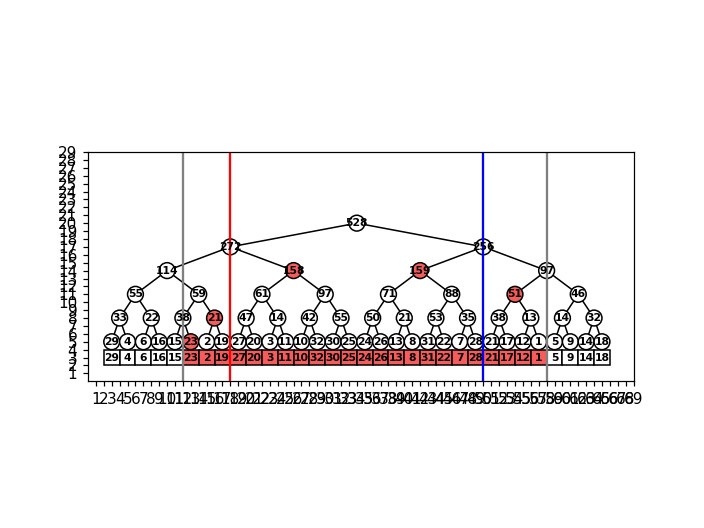

VBox()

se va a ejecutar la consulta


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
from matplotlib.patches import PathPatch
from matplotlib.patches import Path
from matplotlib.transforms import Bbox
import random 
%matplotlib nbagg 

out1 = widgets.Output()
display(out1)
class crear_segment_tree: 
     
    def poner_linea(self,u,v): 
        xu,yu = seg_tree[u][1].get_center()
        xv,yv = seg_tree[v][1].get_center()
        linea = PathPatch(Path([self.inter_points(rad,xu,yu,xv,yv),self.inter_points(rad,xv,yv,xu,yu)]), facecolor='none', edgecolor='black')
        ax.add_patch(linea)
    def inter_points(self,rad,x1,y1,x2,y2): 
        phi = math.atan2(y2-y1, x2-x1)
        x = x1 + rad * math.cos(phi)
        y = y1 + rad * math.sin(phi)
        return (x,y)
    def __init__(self): 
        #cambiar layout 
        global seg_tree
        global arr_entrada
        global arr_im
        self.ind = len(arr_entrada) - 1
        self.painted_nodes = [] 
        self.seg_tree = []
        #creacion del árbol 
        seg_tree = [[None,None,None] for i in range(0,2*len(arr_entrada))] 
        n = len(arr_entrada)
        #poner la imagen del arreglo son de 1x1 
        arr_im = [[None,None] for i in range(0,n)]
        curr_x = 2 
        first_y = 2 
        for i in range(0,len(arr_entrada)):
            r = Rectangle((curr_x, first_y), 2*rad, 2*rad,edgecolor = 'black',facecolor = 'white')
            ax.add_patch(r)
            x = curr_x + rad 
            y = first_y + rad
            anot = ax.annotate(str(arr_entrada[i]), (x, y), color='black', weight='bold', fontsize=7, ha='center', va='center')
            arr_im[i] = [r,anot]
            curr_x = curr_x + 2*rad 
        curr_x = 2 
        first_y = first_y + 2 
        for i in range(0,len(arr_entrada)):
            x,y = arr_im[i][0].get_xy()
            c = Circle((x + rad,y+3*rad),radius = rad,facecolor = 'white',edgecolor = 'black')
            ax.add_patch(c)
            anot = ax.annotate(str(arr_entrada[i]), (x+rad, y+3*rad), color='black', weight='bold', fontsize=7, ha='center', va='center')
            seg_tree[i + n] = [arr_entrada[i],c,anot]
            curr_x = curr_x + 3*rad       
         #pintar el resto del árbol 
        for i in range(n-1,0,-1): 
            xl,yl = seg_tree[2*i][1].get_center()
            xr,yr = seg_tree[2*i+1][1].get_center()
            x = (xl + xr) / 2 
            y = yl + 3*rad
            c = Circle((x,y),radius = rad,facecolor = 'white',edgecolor = 'black')
            ax.add_patch(c)
            anot = ax.annotate(str(""), (x, y), color='black', weight='bold', fontsize=7, ha='center', va='center')
            seg_tree[i] = [seg_tree[2*i][0] + seg_tree[2*i+1][0],c,anot]
            self.poner_linea(i,2*i)
            self.poner_linea(i,2*i+1)
            
   
    
    def next_button_handler(self,event):
        if(self.ind == 0): 
            for c in self.painted_nodes:
                c.set(facecolor = 'white')
            estado = elegir_rango()
            estado.main()
            return 
        #actualizar posicion de nivel
        if(self.painted_nodes): 
            for c in self.painted_nodes:
                c.set(facecolor = 'white')
                self.painted_nodes = []
        [i,c,anot] = seg_tree[self.ind]
        lc = seg_tree[self.ind*2][1]
        rc = seg_tree[self.ind*2+1][1]
        self.painted_nodes = [c,lc,rc]
        anot.set(text = str(i))
        for x in self.painted_nodes: 
            x.set(facecolor = 'pink')
        self.ind = self.ind - 1

    def main(self):
        next_button = widgets.Button(description='siguiente')
        controles.children = [next_button]
        next_button.on_click(self.next_button_handler)
        
class elegir_rango: 
    left_line = None 
    right_line = None
    out = out1
    def poner_lineas(self): 
        #va a tomar el ind_qry, cambia la lineas 
        global ind_qry 
        l = ind_qry[0] if (len(ind_qry) == 1) else  min(ind_qry[0],ind_qry[1]) 
        r = ind_qry[0] if (len(ind_qry) == 1) else  max(ind_qry[0],ind_qry[1])
        lx = arr_im[l][0].get_xy()[0]
        rx = arr_im[r][0].get_xy()[0]
        if(self.left_line == None): 
            self.left_line =  ax.axvline(1,color = 'grey')
        self.left_line.set(xdata = lx)
        if(self.right_line == None): 
            self.right_line =  ax.axvline(1,color = 'grey')
        self.right_line.set(xdata = rx + 2*rad)
    @out.capture()
    def onclick(self,event):
        global arr_im
        global ind_qry
        n = len(arr_entrada)
        for i in range(0,len(arr_im)):
            x,y = arr_im[i][0].get_xy()
            if(x <= event.xdata and event.xdata <= x+2*rad and 
               y <= event.ydata and event.ydata <= y+2*rad):
                if(len(ind_qry) == 2): 
                    f_ind = ind_qry[0]
                    ind_qry.pop(0)
                ind_qry.append(i)
                self.poner_lineas() 
    def ready_button_handler(self,event):
        if(len(ind_qry) < 1): 
            return 
        ind_qry.sort()
        global estado
        fig.canvas.mpl_disconnect(self.cid)
        print("se va a ejecutar la consulta")
        estado = ejecutar_consulta() 
        estado.main()
    def main(self): 
        self.cid = fig.canvas.mpl_connect('button_press_event', self.onclick)
        ready_button = widgets.Button(description='listo')
        controles.children = [ready_button]
        ready_button.on_click(self.ready_button_handler)
        
class ejecutar_consulta: 
    def __init__(self): 
        n = len(arr_entrada)
        self.l_ind = ind_qry[0] + n
        self.r_ind = ind_qry[1] + n 
        self.l_line =  ax.axvline(seg_tree[self.l_ind][1].get_center()[0])
        self.r_line =  ax.axvline(seg_tree[self.r_ind][1].get_center()[0])
        self.l_line.set(color = 'blue')
        self.r_line.set(color = 'red')
    def pintar_bajo_nodo(self,i):  
        cola = [i]  
        hojas = []
        n = len(arr_entrada)
        global arr_im
        while cola: 
            x = cola[0]
            cola.pop(0)
            if(2*x + 1 < len(seg_tree)): 
                cola.append(2*x)
                cola.append(2*x + 1)
            if(len(seg_tree) <= 2*x ):
                hojas.append(x)  
        for i in hojas: 
            arr_im[i - n][0].set(facecolor = '#F75C5C')
            
    def next_button_handler(self,event):
        global seg_tree
        if(self.l_ind % 2 == 1): 
            seg_tree[self.l_ind][1].set(facecolor = '#F75C5C')
            self.pintar_bajo_nodo(self.l_ind)
            self.l_ind = self.l_ind + 1 
        if(self.r_ind % 2 == 0): 
            seg_tree[self.r_ind][1].set(facecolor = '#F75C5C')
            self.pintar_bajo_nodo(self.r_ind)
            self.r_ind = self.r_ind - 1
        self.l_ind = self.l_ind // 2
        self.r_ind = self.r_ind // 2
        #poner linea 
        self.l_line.set(xdata = seg_tree[self.l_ind][1].get_center()[0])
        self.r_line.set(xdata = seg_tree[self.r_ind][1].get_center()[0])
    def main(self):
        next_button = widgets.Button(description='siguiente')
        controles.children = [next_button]
        next_button.on_click(self.next_button_handler)
        
fig, ax = plt.subplots()
maxim_x = 70
maxim_y = 30
plt.xticks(range(1,maxim_x))
plt.yticks(range(1,maxim_y))
plt.gca().set_aspect('equal', adjustable='box')
controles = widgets.VBox([])
display(controles)
#algunas variables globales 
rad = 1
arr_entrada = [i for i in range(1,33)]
seg_tree = []
arr_im = []
ind_qry = [] 
random.shuffle(arr_entrada)
estado = crear_segment_tree()
estado.main()

